In [1]:
# import numpy, pandas, matplotlib, seaborn
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# 1. Data cleaning and EDA

In [2]:
# let's load the dataset as a pandas dataframe
df = pd.read_csv(r'Problem statement 1_dataset/adult.csv')

#check
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# check the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# let's check value_counts of the target column
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

<AxesSubplot:title={'center':'Salary distribution of Males'}>

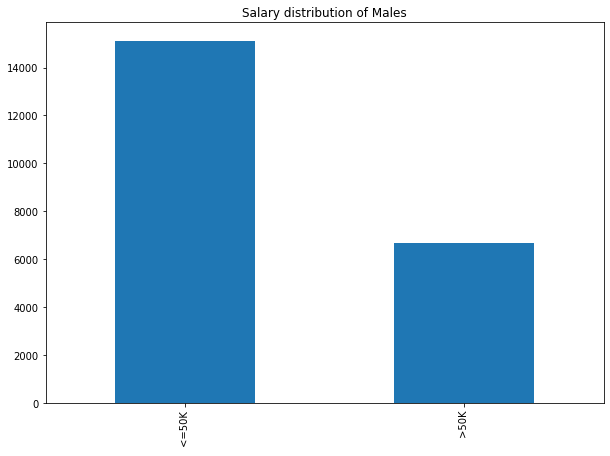

In [5]:
# let's check the Male's salary distribution
df[df['sex'] == ' Male']['salary'].value_counts().plot(kind = 'bar', figsize = (10,7), title = 'Salary distribution of Males')

<AxesSubplot:title={'center':'Salary distribution of Females'}>

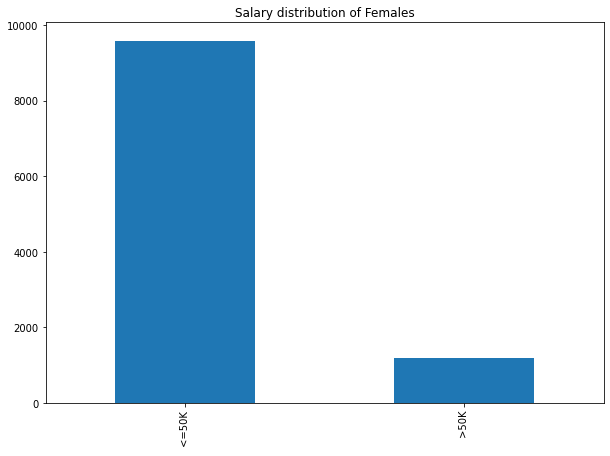

In [6]:
# let's check the Male's salary distribution
df[df['sex'] == ' Female']['salary'].value_counts().plot(kind = 'bar', figsize = (10,7), title = 'Salary distribution of Females')

Let's convert this column to numerical type, by mapping 0 and 1 to the above two values respectively.

In [7]:
df['salary'] = df['salary'].map({' <=50K':'0',' >50K':1})

In [8]:
#cross check
df['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

# 2. Feature Engineering

In [9]:
# let's split the categorical columns into two groups, i.e., ordinal and nominal
nominal = ['sex','race','country','relationship','occupation','marital-status','workclass']
ordinal = ['education']

In [10]:
# let's do one hot encoding for the nominal variables
dummies = pd.get_dummies(df[nominal], drop_first = True)

#check
dummies

,sex_ Male,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,country_ Cambodia,country_ Canada,country_ China,country_ Columbia,country_ Cuba,...,marital-status_ Separated,marital-status_ Widowed,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
32557,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
32558,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
32559,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
# let's concat this with the main dataframe and drop the original columns
df = pd.concat([df,dummies], axis = 1)
df.drop(nominal,axis = 1, inplace = True)

# check
df.head()

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,salary,sex_ Male,race_ Asian-Pac-Islander,...,marital-status_ Separated,marital-status_ Widowed,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,39,77516,Bachelors,13,2174,0,40,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,50,83311,Bachelors,13,0,0,13,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,HS-grad,9,0,0,40,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,53,234721,11th,7,0,0,40,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,28,338409,Bachelors,13,0,0,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
# check the value counts of the ordinal column education.
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [13]:
# let's merge some of the values 
df['education'] = df['education'].apply(lambda x: 'primary' if x in [' Preschool',' 1st-4th',' 5th-6th'] 
                      else ('secondary' if x in [' 7th-8th',' 9th',' 10th',' 11th',' 12th'] else 'higher_education'))

In [14]:
# cross check
df['education'].value_counts()

higher_education    28308
secondary            3701
primary               552
Name: education, dtype: int64

In [15]:
# now, let's map the above values with numbers in order
df['education'] = df['education'].map({'primary':0, 'secondary':1, 'higher_education':2})
# cross check
df['education'].value_counts()

2    28308
1     3701
0      552
Name: education, dtype: int64

In [16]:
# so now we have all the features in numerical form
df.head()

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,salary,sex_ Male,race_ Asian-Pac-Islander,...,marital-status_ Separated,marital-status_ Widowed,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,39,77516,2,13,2174,0,40,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,50,83311,2,13,0,0,13,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,2,9,0,0,40,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,53,234721,1,7,0,0,40,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,28,338409,2,13,0,0,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
# split the data into training and testing sets, with 30% data as a testing dataset.
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.3, random_state = 32)

In [18]:
print(train.shape)
print(test.shape)

(22792, 87)
(9769, 87)


<AxesSubplot:title={'center':'Check for the class imbalance'}>

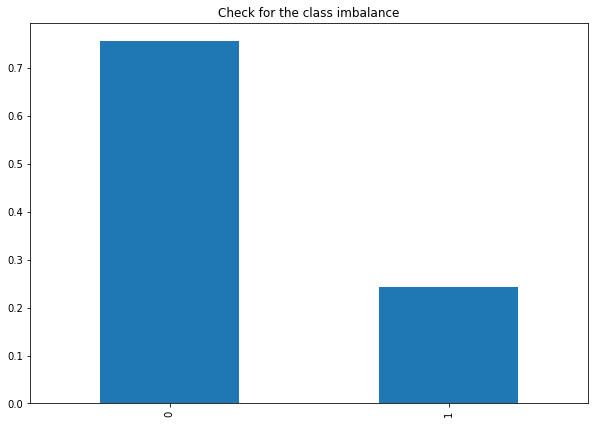

In [19]:
# now let's check whether there's any class imbalance in the training set
train['salary'].value_counts(normalize = True).plot(kind = 'bar', title = 'Check for the class imbalance', figsize = (10,7))

`Inference:` There are more number of people having salary <=50K. Let's reduce the class imbalance using the undersampling technique.

In [20]:
#importing NearMiss from imblearn. 
from imblearn.under_sampling import NearMiss

nm = NearMiss(version = 1)  # we will be using NearMiss version 1. 

In [21]:
# let's split both the training and testing data into independent and dependent features respectively
X_train = train.drop('salary', axis = 1)
X_test = test.drop('salary', axis = 1)

y_train = train['salary'].copy()
y_test = test['salary'].copy()

In [22]:
# check
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(22792, 86) (22792,)
(9769, 86) (9769,)


In [23]:
y_train = y_train.astype('int')

In [24]:
y_test = y_test.astype('int')

In [25]:
# fit on the training data
X_train, y_train = nm.fit_resample(X_train, y_train)

<AxesSubplot:title={'center':'Cross check'}>

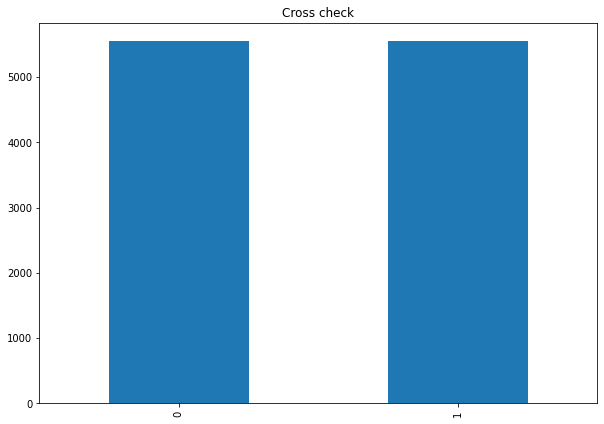

In [26]:
# now, let's check the value count to confirm
y_train.value_counts().plot(kind = 'bar', figsize = (10,7), title = 'Cross check')

In [27]:
# cross check 2
print(X_train.shape, y_train.shape)

(11102, 86) (11102,)


# 3. Model building and evaluation

In [28]:
# let's import xgboost
import xgboost

In [29]:
# using randomized search cv to get the best xgboost classifier model
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
xgbc = XGBClassifier()

params = {
          'learning_rate': [0.1,0.2,0.5,0.8,1],
          'max_depth': [2,3,4,5,6,7,8,10],
          'subsample': [0.001,0.009,0.01,0.09,0.1,0.4,0.9,1],
          'min_child_weight': [1,2,4,5,8],
          'gamma': [0.0,0.1,0.2,0.3],
          'colsample_bytree': [0.3,0.5,0.7,1.0,1.4],
          'reg_alpha': [0,0.1,0.2,0.4,0.5,0.7,0.9,1,4,8,10,50,100],
          'reg_lambda': [1,4,5,10,20,50,100,200,500,800,1000]
          
         }

#Using Randomized search cv
rcv = RandomizedSearchCV(estimator=xgbc, param_distributions=params, n_iter = 5, 
                                scoring='roc_auc', cv = 10, verbose=2, 
                                random_state=42, n_jobs=-1, return_train_score=True)
rcv.fit(X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


C:\Users\srira\anaconda3\envs\mu_sigma\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\srira\anaconda3\envs\mu_sigma\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\srira\anaconda3\envs\mu_sigma\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\srira\anaconda3\envs\mu_sigma\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "C:\Users\srira\a

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None...
                                        'gamma': [0.0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.1, 0.2, 0.5, 0.8,
                                                          1],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 10],
                                        'min_child_weight': [1, 2, 4, 5, 8],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.5,
                                                      0.7, 0.9, 1, 4, 8, 10, 50,
                                                      100],
                                        'reg_lambda': [1, 4, 5, 10, 20, 50, 100,
                                                       200, 500, 800, 1000],
                                        'subsample': [0.001, 0.009, 0.01, 0.09,
                                                      0.1, 0.4, 0.9, 1]},
                   random_state=42, return_train_score=True, scoring='roc_auc',
                   verbose=2)

In [30]:
rcv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=8,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=4, reg_lambda=200, ...)

In [31]:
# let's check the best score
rcv.best_score_

0.9291342382631516

In [32]:
# let's store our model in a variable called xgbc_best
xgbc_best = rcv.best_estimator_

In [33]:
# let's fit on the train data
xgbc_best.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=8,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=4, reg_lambda=200, ...)

In [34]:
# make predictions on the train data
y_pred_train = xgbc_best.predict(X_train)

In [35]:
# make predictions on the test data
y_pred_test = xgbc_best.predict(X_test)

In [36]:
# check
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
# check 2
y_pred_train

array([1, 0, 1, ..., 1, 1, 0])

In [38]:
# import the evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

### Model performance on the train data

In [39]:
# let's check the confusion matrix on the train data
confusion_matrix(y_train, y_pred_train)

## TN FP
## FN TP

array([[4753,  798],
       [ 770, 4781]], dtype=int64)

In [40]:
print('Accuracy score on train data: ', accuracy_score(y_train,y_pred_train))

Accuracy score on train data:  0.8587641866330391


In [41]:
print('Precision score on the train data', precision_score(y_train,y_pred_train))

Precision score on the train data 0.8569636135508155


In [42]:
print('Recall score on the train data', recall_score(y_train,y_pred_train))

Recall score on the train data 0.8612862547288777


### Model performance on the test data

In [43]:
# confusion matrix
confusion_matrix(y_test, y_pred_test)

## TN FP
## FN TP

array([[5516, 1963],
       [ 359, 1931]], dtype=int64)

In [44]:
print('Accuracy score on test data: ', accuracy_score(y_test,y_pred_test))

Accuracy score on test data:  0.7623093458900604


In [45]:
print('Precision score on the test data', precision_score(y_test,y_pred_test))

Precision score on the test data 0.4958911145351823


In [46]:
print('Recall score on the test data', recall_score(y_test,y_pred_test))

Recall score on the test data 0.8432314410480349


In [47]:
rcv.best_params_

{'subsample': 1,
 'reg_lambda': 200,
 'reg_alpha': 4,
 'min_child_weight': 8,
 'max_depth': 10,
 'learning_rate': 0.2,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

### Saving the model

In [48]:
import joblib

In [49]:
joblib.dump(xgbc_best, 'models/xgboost_model.pkl')

['models/xgboost_model.pkl']